In [1]:
%run d:/Work/Java/SOA/Homew6/homew6.py

Point  = ([-0.19433351 -4.80450996])
Value = 23.12108


In [2]:

nr_iterations=[50,100,500]
functions=[func_spehre,func_rosenbrock,func_rastrigin,func_griewank]
bounds={
    'func_spehre':{'low':[-20,-20],'up':[20,20]},
    'func_rosenbrock':{'low':[-30,-30],'up':[30,30]},
    'func_rastrigin':{'low':[-5.12,-5.12],'up':[5.12,5.12]},
    'func_griewank':{'low':[-200,-200],'up':[200,200]}
}



In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
def plot_table(columns,data,title):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    row_labels = None
    table_vals = data

    # Draw table
    the_table = plt.table(cellText=data,
                          colWidths=[0.1,0.1,0.11,0.35,0.2],
                          rowLabels=None,
                          colLabels=columns,
                          loc='bottom',
                            cellLoc = 'left')
    the_table.auto_set_font_size(False)
    the_table.set_fontsize(22)
    the_table.scale(4, 4)

    # Removing ticks and spines enables you to get the figure only with table
    plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
    plt.tick_params(axis='y', which='both', right=False, left=False, labelleft=False)
    for pos in ['right','top','bottom','left']:
        plt.gca().spines[pos].set_visible(False)
    plt.text(-1,1,title,fontsize=25)
    plt.show()

Function func_spehre


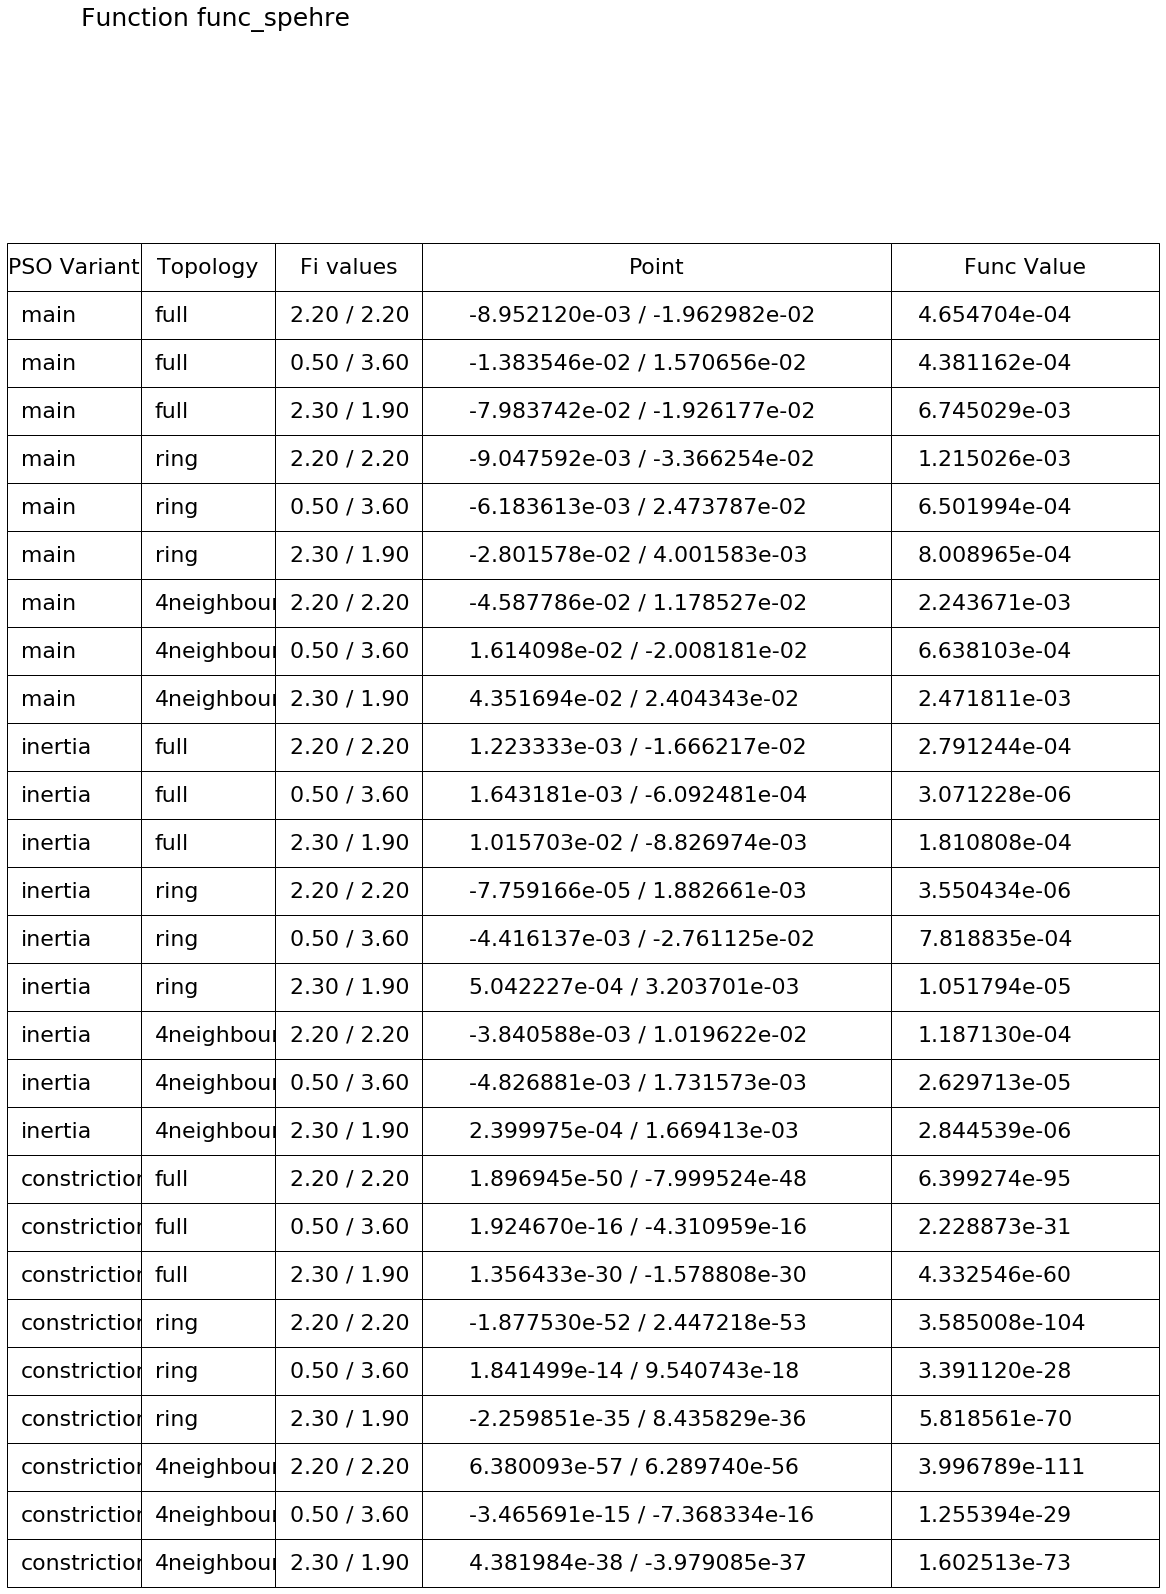



Function func_rosenbrock


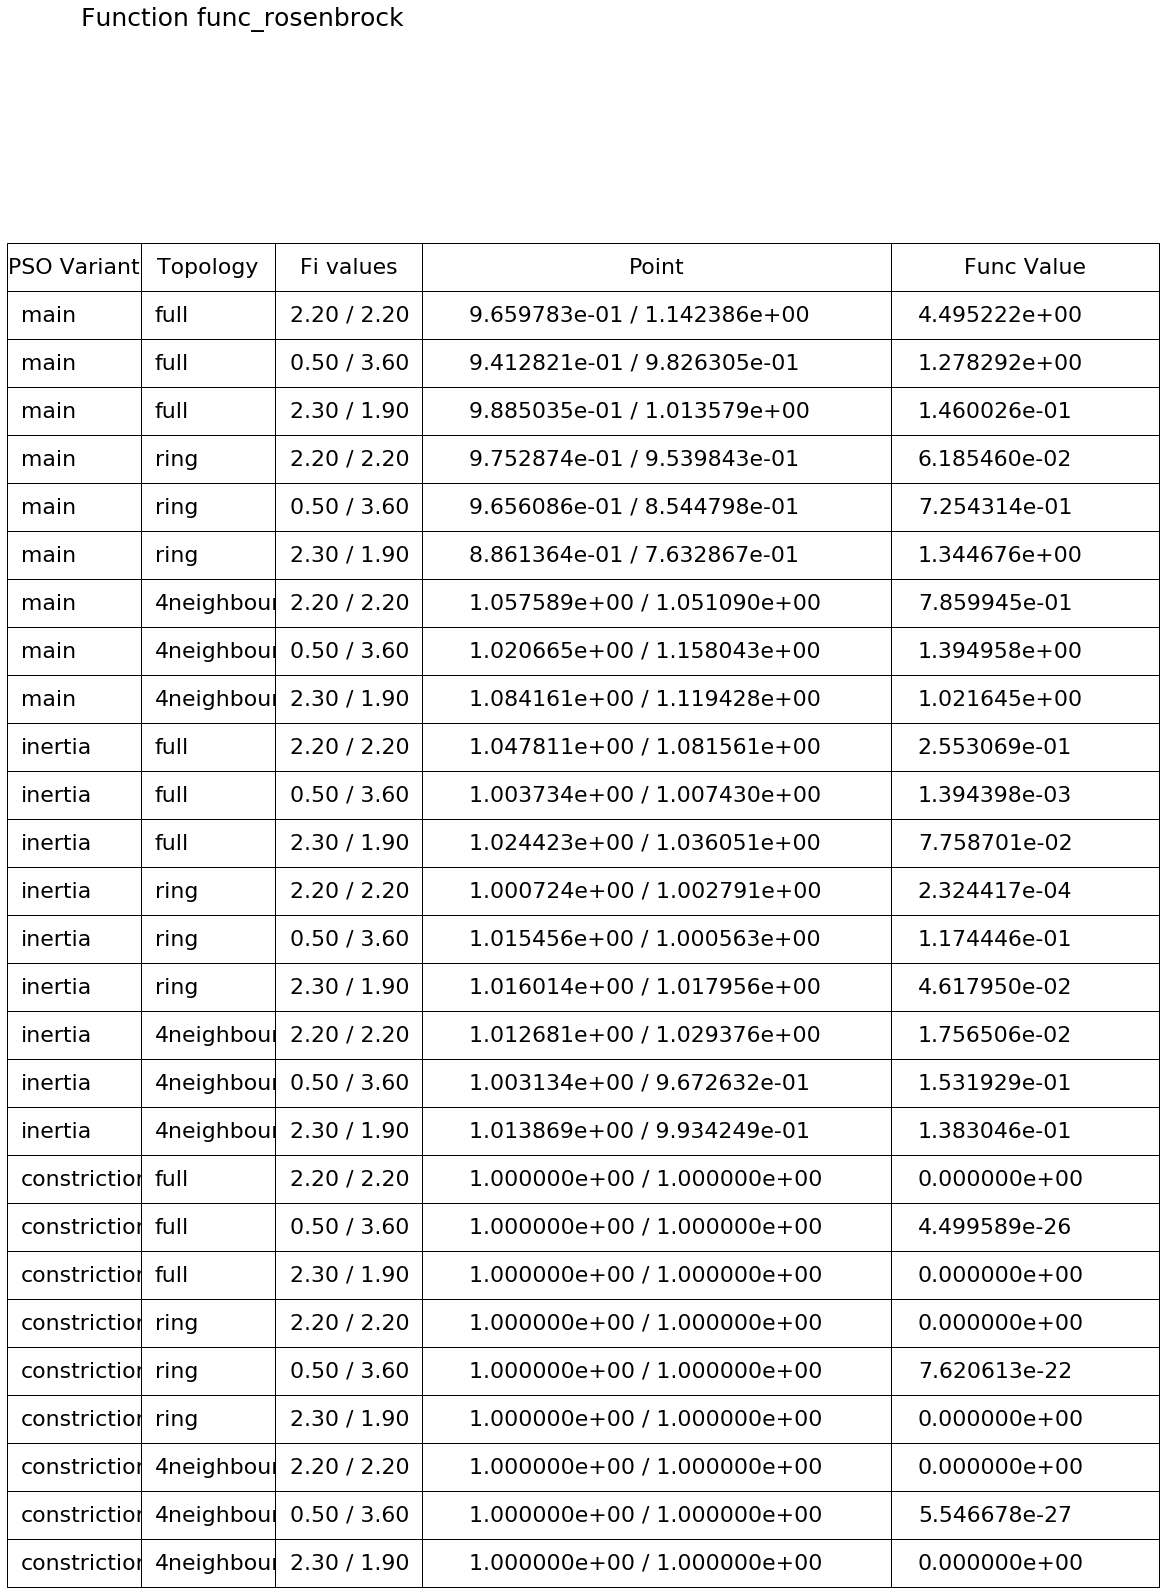



Function func_rastrigin


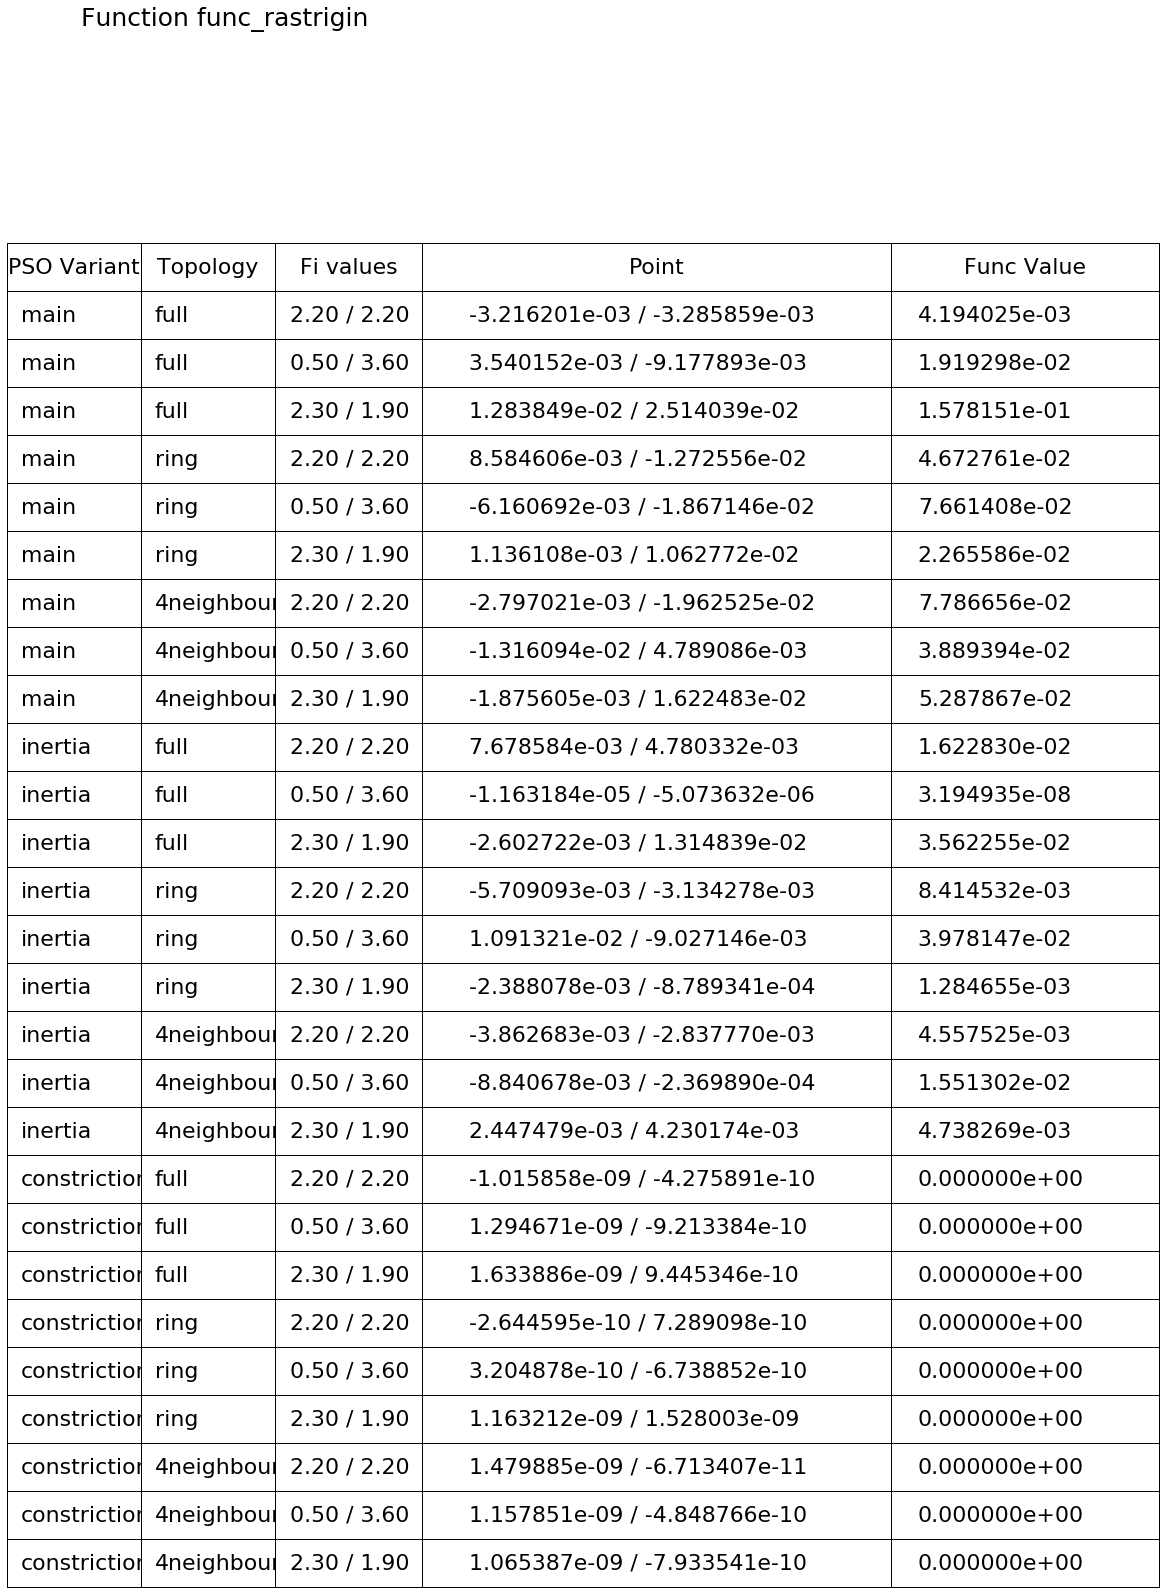



Function func_griewank


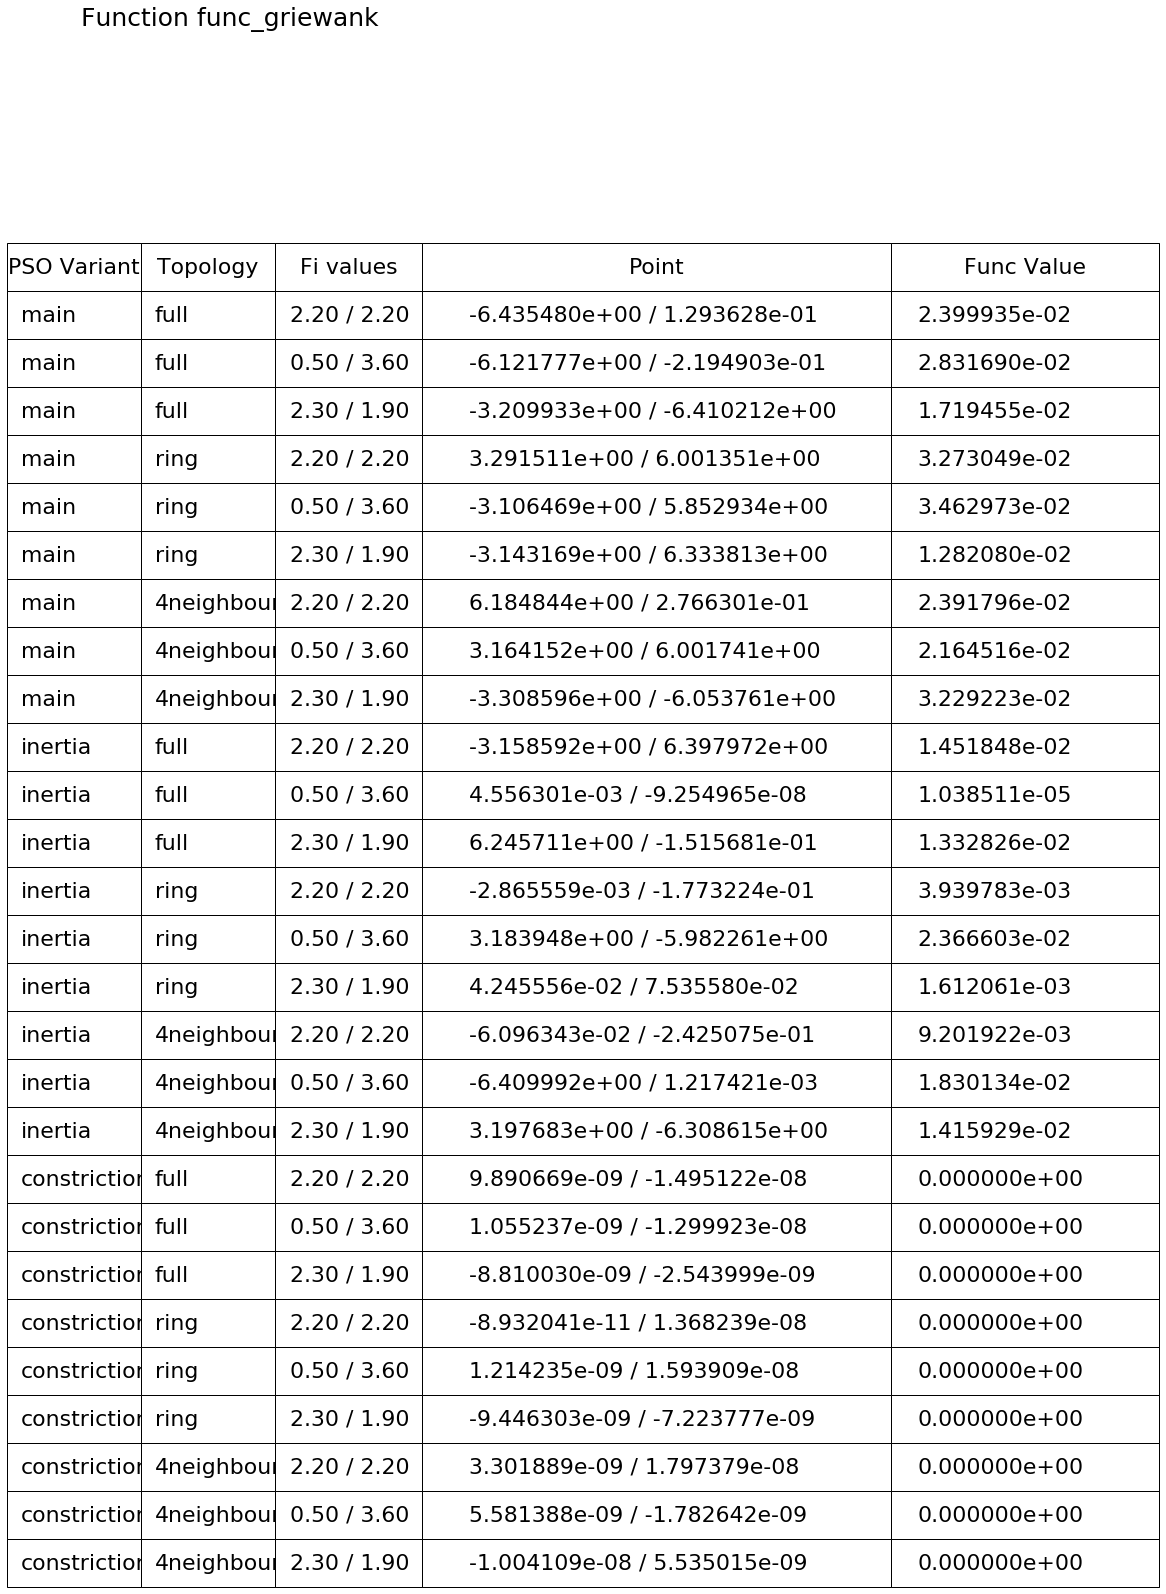

In [4]:
import numpy as np

for func in functions:
    print("Function %s" % func.__name__)
    
    columns=('Function', 'nr Iterations', 'Best Point', 'Best Func Value', 'Mean Func Value')
    bb = bounds[func.__name__]
    
    data=[]
    
    for nr in nr_iterations:
        d=[func.__name__, nr]
        best_pos = None
        best_val = None
        vals =[]
        
        for i in range(0,30):
            bp, bv, _ = Dispatcher(costFunc=func_spehre, nr_dimensions=2, bounds_down=bb['low'], bounds_up=bb['up']).run(nr_iterations=nr)
            vals.append(bv)
            if (best_val is None) or (bv<best_val):
                best_pos = bp
                best_val = bv
                
        d.append("%e / %e" % (best_pos[0],best_pos[1]))
        d.append("%e" % best_val)
        d.append("%e" % np.mean(vals))

        data.append(d)
                
    plot_table(columns,data,"Function %s" % func.__name__)
    print("="*80)
    print("\n")
    

In [105]:
best_pos, best_val, hist = PSO(
        topology_type='full', costFunc=func_spehre, nr_dimensions=2,
        fi1=2.2, fi2=2.2, w=1.2, constriction=None, bounds_down=[-50,-50], bounds_up=[50,50]
    ).run()


In [108]:
get_constriction(2.2,2.2)

0.5366750419289199

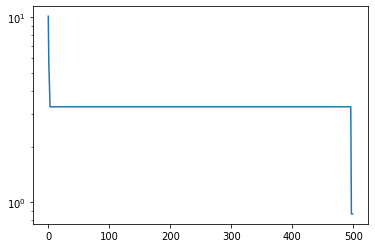

In [106]:
plt.plot(range(0,MAX_ITERATIONS),hist)
plt.yscale("log")
plt.show()